<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/In-Class_Problems/ML23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nick Azzarano
<br/>
Machine Learning
<br/>
In class notebook for week 12.

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import matplotlib.pyplot as plt

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("playlist/mnistzip")

# print("Path to dataset files:", path)

In [2]:
# https://www.kaggle.com/datasets/playlist/mnistzip/
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: mnist_png/valid/4/8664.png  
  inflating: mnist_png/valid/4/8675.png  
  inflating: mnist_png/valid/4/8685.png  
  inflating: mnist_png/valid/4/8695.png  
  inflating: mnist_png/valid/4/8709.png  
  inflating: mnist_png/valid/4/8743.png  
  inflating: mnist_png/valid/4/8754.png  
  inflating: mnist_png/valid/4/8755.png  
  inflating: mnist_png/valid/4/8757.png  
  inflating: mnist_png/valid/4/8770.png  
  inflating: mnist_png/valid/4/8773.png  
  inflating: mnist_png/valid/4/8775.png  
  inflating: mnist_png/valid/4/8790.png  
  inflating: mnist_png/valid/4/8797.png  
  inflating: mnist_png/valid/4/8802.png  
  inflating: mnist_png/valid/4/881.png  
  inflating: mnist_png/valid/4/8812.png  
  inflating: mnist_png/valid/4/8822.png  
  inflating: mnist_png/valid/4/8829.png  
  inflating: mnist_png/valid/4/8832.png  
  inflating: mnist_png/valid/4/8836.png  
  inflating: mnist_png/valid/4/8861.png  
  inflating: mnist_png/val

In [3]:
im = read_image('mnist_png/valid/9/9497.png')

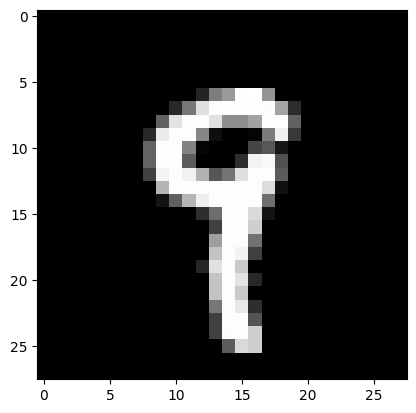

In [4]:
plt.imshow(im.permute(1, 2, 0)/255, cmap='gray')

In [5]:
root_dir = 'mnist_png'

In [6]:
import pathlib

In [7]:
class MNIST_dataset(Dataset):
  def __init__(self, path_to_data):
    super().__init__()
    self.path_to_data = pathlib.Path(path_to_data)
    self.paths = list(self.path_to_data.rglob('*.png'))

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
     return read_image(self.paths[index].as_posix()).squeeze(dim=0)/255, \
        torch.tensor(int(self.paths[index].as_posix().split('/')[-2]))

In [8]:
train_data = MNIST_dataset(root_dir)

In [9]:
val_data = MNIST_dataset(root_dir+'/valid')

In [10]:
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)
valid_data_loader = DataLoader(val_data, batch_size=64, shuffle=False, drop_last=True)

In [11]:
import torch.nn as nn
from torch.optim import Adam

In [12]:
class MyModel(nn.Module):
  def __init__(self, h_d):
    super().__init__()
    self.f = nn.Sequential(nn.Flatten(1,-1),
      nn.Linear(28*28, h_d),
      nn.ReLU(),
      nn.Linear(h_d, 10),
      #self.out = nn.Softmax(-1)
      )

  def forward(self, x):
      # o= self.flat(x)
      # o = self.fc1(o)
      # o = self.a(o)
      # o = self.fc2(o)
      return self.f(x) #self.out(o)

In [13]:
model = MyModel(128)
creterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

In [14]:
from tqdm.notebook import tqdm, trange
from torch.utils.tensorboard.writer import SummaryWriter
from sklearn.metrics import accuracy_score

In [15]:
writer = SummaryWriter()

In [ ]:
# USe this to delete the runs folder
#!rm -rf runs

In [ ]:
# #hist = []
# #for epoch in range(100):
# for epoch in trange(10):
#   for x_b, y_b in train_data_loader:
#     y_pred = model.forward(x_b)
#     loss = creterion(y_pred, y_b)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#     #hist.append(loss.item())
#     writer.add_scalar('Loss/train', loss.item(), epoch)
#   if epoch % 2 == 0:  # this number should be 5 or 10 instead of 2 on homework probably
#     with torch.no_grad():
#       acc = 0
#       val_loss = 0
#       for x_b, y_b in valid_data_loader:
#         y_pred = model.forward(x_b)
#         acc += accuracy_score(y_pred.argmax(-1), y_b)
#         val_loss += creterion(y_pred, y_b).item()
#       writer.add_scalar('Loss/valid', val_loss/len(valid_data_loader), epoch)
#       writer.add_scalar('Acc/valid', acc/len(valid_data_loader), epoch)

In [16]:
for epoch in trange(10):
  for x_b, y_b in train_data_loader:
    y_pred = model.forward(x_b)
    loss = creterion(y_pred, y_b)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #hist.append(loss.item())
    writer.add_scalar('train_loss', loss.item(), epoch)

  if epoch % 2 == 0:
    with torch.no_grad():
      acc = 0
      val_loss = 0
      for x_b, y_b in valid_data_loader:
        y_pred = model.forward(x_b)
        val_loss += creterion(y_pred, y_b)
        acc += accuracy_score(y_pred.argmax(dim=1), y_b)
      writer.add_scalar('valid_loss', val_loss/len(valid_data_loader), epoch)
      writer.add_scalar('valid_acc', acc/len(valid_data_loader), epoch)

  0%|          | 0/10 [00:00<?, ?it/s]

In [50]:
# %load_ext tensorboard

In [51]:
# %tensorboard --logdir=runs

In [ ]:
with torch.no_grad():
  acc = 0
  for x_b, y_b in valid_data_loader:
    y_pred = model.forward(x_b)
    print(accuracy_score(y_pred.argmax(-1), y_b))
    acc += accuracy_score(y_pred.argmax(-1), y_b)
  print(acc / len(val_data))

In [ ]:
###########################

In [19]:
import PIL.Image

In [37]:
im = PIL.Image.open('mnist_png/valid/4/48.png').convert('L')
# .convert('L') is to make the image grayscale rather than RGB
# we could use .convert('RGB') if we wanted an RGB image instead

In [38]:
import torchvision.transforms.v2 as T

In [39]:
NETWORK_INPUT_SIZE = (28,28) # the expected size of our image

In [40]:
TRANSFORM = T.Compose([
    T.ToImage(),
    T.ToDtype(dtype = torch.float32, scale = True),
    T.Resize(size = NETWORK_INPUT_SIZE),
    #T.normalize(...)   we will use this for the project !!!
    #T.ToTensor()
])

In [41]:
TRANSFORM(im)

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [42]:
TRANSFORM(im).shape  # notice how there are 3 channels instead of 1 now. Meaning it's RGB when we just want grayscale.
# Fixed this with .convert('L') up a few cells

torch.Size([1, 28, 28])

In [43]:
TRANSFORM(im).max()

tensor(1.)

In [44]:
(1 - TRANSFORM(im)).min()

tensor(0.)

In [45]:
(1 - TRANSFORM(im)).clamp(0,1).min()

tensor(0.)

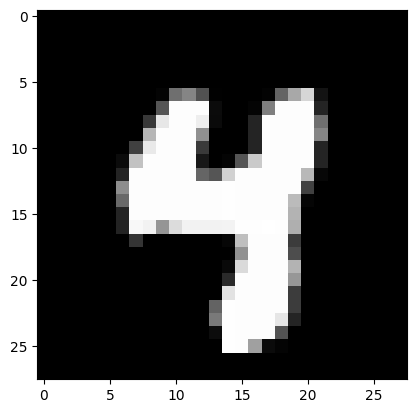

In [46]:
plt.imshow(TRANSFORM(im).permute(1, 2, 0), cmap='gray')

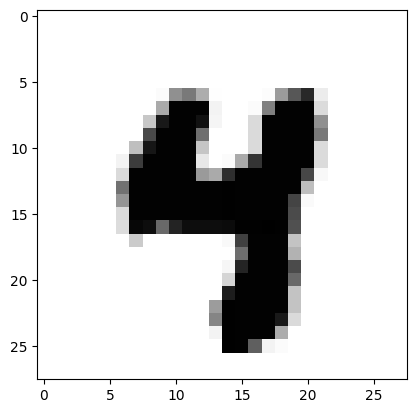

In [47]:
plt.imshow((1 - TRANSFORM(im)).clamp(0,1).permute(1, 2, 0), cmap='gray')

In [48]:
with torch.no_grad():
  print(model(TRANSFORM(im)).argmax(-1))

# THIS IS WHERE CLASSIFICATION HAPPENS. REMEMBER THE EXAMPLE IN CLASS WITH THE '5' IMAGE
# THE MODEL PREDICTED 5 HERE IN THIS CELL

tensor([4])


In [49]:
with torch.no_grad():
  print(model((1 - TRANSFORM(im)).clamp(0,1)).argmax(-1))

# THIS IS WHERE CLASSIFICATION HAPPENS. REMEMBER THE EXAMPLE IN CLASS WITH THE '5' IMAGE
# THE MODEL PREDICTED 5 HERE IN THIS CELL

tensor([2])


In [ ]:
torch.save(model.state_dict(), 'my_model.pt') # save the weights

In [ ]:
# upload the pre-trained weights
model.load_state_dict(torch.load('my_model.pt'))

In [ ]:
T.ToImage()(im)

In [ ]:
T.ToImage()(im).shape

In [ ]:
# to normalize the image, meaning the pixels are now from 0 to 1
T.ToDtype(dtype = torch.float32, scale = True)(T.ToImage()(im))